## K-NN  

K-NN is a classification algorithms. Classification is based on the nearest neighbors' vote.

Example: if an unseen example has 4 neighbors voting red and one neighbor voting blue, the new unseen example will be classified as RED.

We decide how many neighbors we want to include in the "voting". In the previous exmaple the nearest neighbors who voted were 5 (4 reds 1 blue).


In [85]:
## importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wget
import seaborn as sns



### Downloading and Importing the dataset.

In [2]:
## downloading the data using the url
url="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv"

File=wget.download(url)
print("\n download completed")

100% [..............................................................................] 37048 / 37048
 download completed


In [3]:
data_set= pd.read_csv("teleCust1000t.csv") ##reading the data.

In [4]:
##Inspecting the data
data_set.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [5]:
##making sure that there's no missing values and looking for patterns in the set.
data_set.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


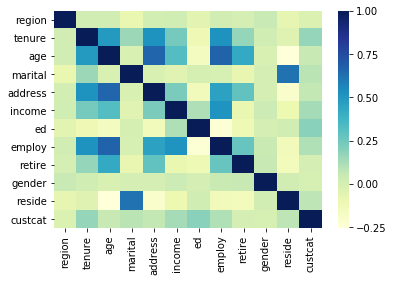

In [89]:
## drawing the correlation heat map.
corr=data_set.corr()

sns.heatmap(corr,cmap="YlGnBu")

In [6]:
### Checking the distribution of our target data 

data_set.custcat.value_counts()


3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [7]:
### Normalizing the values to see the %
data_set.custcat.value_counts(normalize=True) 
## in our case we have 1000 total values, therefore the normalization
## didnt help much, but in general having normalized  counts help better understand the data


3    0.281
1    0.266
4    0.236
2    0.217
Name: custcat, dtype: float64

### Creating the features and target data.

In [8]:
## no further feature selection was made.
features=data_set.drop("custcat",axis=1) ## dropping the target column for the features set

In [90]:
##checking that the target is in its correct shape
target=data_set.custcat.values 

# target



In [91]:
## checking the features we can see that there's a scale difference between the values.
## Since KNN works on measuring similarities it is optimal to standarize or normalize the data.
features.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000


In [92]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler ## see the details

StandardScaler(copy=True, with_mean=True, with_std=True)

In [93]:
## Standarizing (0,1)

features_scaled = scaler.fit_transform(features)

features_scaled[:5] ## ==> as we can see now all the values are around the 1.x range


array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [94]:
## importing and initializing the KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test= train_test_split(features_scaled,target,test_size=0.2,random_state=10)

knn= KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train.ravel())

y_predicted=knn.predict(X_test)

train_predicted=knn.predict(X_train)


print("Accuracy on train set:",accuracy_score(y_train,train_predicted))
print("Accuracy on test set:", accuracy_score(y_test,y_predicted))

Accuracy on train set: 0.5325
Accuracy on test set: 0.36


### Multiple testing.

In the following we are going to find something called "Elbow Method" by examining the accuracy of KNN using different K.


In [95]:
knnvalues=[]
knntrainvalues=[]
for x in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train,y_train.ravel())
    y_predicted=knn.predict(X_test)
    y_predict_train=knn.predict(X_train)
    accuracy=accuracy_score(y_test,y_predicted)
    accuracy_train=accuracy_score(y_train,y_predict_train)
    knntrainvalues.append(accuracy_train)
    knnvalues.append(accuracy)

    


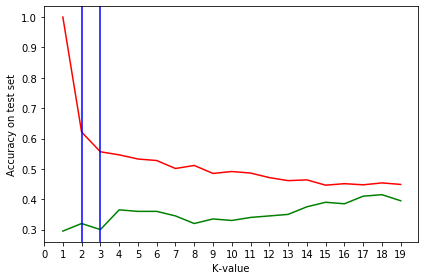

In [96]:
## Now that we have collected the KNN accuracy values. we are going to plot them

plt.plot(range(1,20),knnvalues,color="green")
plt.plot(range(1,20),knntrainvalues,color="red")
plt.axvline(2, 0, 1, label='Elbow Method',color="blue")
plt.axvline(3, 0, 1, label='Elbow Method',color="blue")
plt.xticks(np.arange(0, 20, step=1))
plt.xlabel("K-value")
plt.ylabel("Accuracy on test set")
plt.tight_layout()
plt.show()


### Analysis
The model shows two elbows. One is very steep and easy to notice which is at K=2 (Doesn't really count).
The other one is at K=4.

### K-Fold Cross validation method.

In [97]:
from sklearn.model_selection import cross_val_score 

Knn_cross= KNeighborsClassifier(n_neighbors=5) ##based on out previous results

cv_scores=cross_val_score(Knn_cross,features_scaled,target.ravel(),cv=5) ## we are going to run 10 cross volidations.

print(cv_scores) ##prints all the scores gotten from the cross_val method
print("the mean score is:",np.mean(cv_scores))

[0.37931034 0.345      0.27638191 0.28643216 0.34170854]
the mean score is: 0.3257665915785825


### GridSearchCV

GridSearch is an easier way to do what we did previously. This function will try for us multiple K's and give us the best performing one.



In [98]:
from sklearn.model_selection import GridSearchCV

Knn_grid= KNeighborsClassifier()

param_grid={"n_neighbors":np.arange(1,30)}

knn_grid=GridSearchCV(Knn_grid,param_grid,cv=5,iid="True")


knn_grid.fit(features_scaled,target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='True', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [99]:
### Finding the best parameter

Best_Paramter=knn_grid.best_params_

print("The best parameter is:", Best_Paramter)
print("The best parameter is:", knn_grid.best_score_)

The best parameter is: {'n_neighbors': 24}
The best parameter is: 0.369
